In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# CIC Initialization Notebook

### Goals
 - Define the Mathematics of the CIC Bonding Curve in formal terms
 - Identify and make explicit the paramters
 - Define the initial state as a function of the parameters
 - Demonstrate the Bonding Curve Shape as a function of the parameters

### Formal Foundations
For a detailed Treatment of properties of Bonding Curves see:
[From Curved Bonding to Configuration Spaces](https://epub.wu.ac.at/7385)
and subsequent Publications on the subject appearing in the Proceedings of IEEE ICBC 2020 and MARBLE 2020.

### System Scope
Broad Mapping of the Grassroots Economics CIC Ecosystem including the CIC Users, the operators of the CIC Program and the underlying smart contracts:
![Conservation of Flow](CICecosystem.jpeg)

Zooming in on the Bonding Curve Smart Contract Subsystem:
![Conservation of Flow](CICecosubsystem.jpeg)

Explicit mapping of Conservation Equations which will regulate the supply of CIC tokens relative to xDAI reserves.
![Conservation of Flow](GrassrootsEconomicsCICcontractconservation.jpeg)

### Questions to be Answered
 - Choose Parameters which characterize the bonding curve mechanisms: $\kappa$ and $\phi$
 - Choose the initial conditions for Supply $S_0$ and Reserve $R_0$
 - Note that due to the Bonding Curve construction its initial conditions partially determine the systems properties.

# Bonding Curve Mathematics

### Basic Definitions
- $R$ = xDai in Reserve
- $S$ = Total Supply of CIC tokens
- $P$ = Spot Price of the Bonding Curve$^*$
- $P \cdot S$ = Market Cap implied by the Spot Price and Token Supply
- $\frac{R}{P \cdot S}$ = Reserve Ratio in the Liquidity Pool$^\dagger$

$^*$ The spot price is the limiting price for both the Bond-to-Mint and the Burn-to-Withdraw Mechanisms in the case with no fees. Realized prices account for slippage and fees, see references.

$^\dagger$ Bonding Curves such as the one being employed by the CIC systems are tools which enforce the Reserve Ratio to be a constant $\rho \in (0,1)$, also called the connector weight. In this work we work with the "curvature" $\kappa = \frac{1}{\rho} = \frac{P \cdot S}{R}$ in order to align notation with associated academic work.

### Invariance and Consequences
Consider the Conservation Function:
- $V(S,R) = \frac{S^\kappa}{R}$
- As a consquence, $P = -\frac{\partial V}{\partial} = \kappa \frac{R}{S}$

In the absense of Fees:
- $V(S,R) = \frac{S^\kappa}{R}$ is constant
- $V(S,R) = V_0$ where $V_0 = \frac{S_0^\kappa}{R_0}$ where $S_0$ and $R_0$ are the initial Supply and Reserve, respectively.

![Invariant](CICinvariant.jpeg)

In the presence of Fees:
- $V(S^+,R^+) > V(S,R)$ for all admissible actions
- $V(S_t,R_t) > V_0$ for all $t>0$ where the index $t$ is an ordering of all transcations on the contract.
- Under the invariant enforcing logic with fees, the reserve accumulates relative to the supply, essentially violating the invariant, but in a manner guaranteed to increase $V$. A concept introduced formally in [A State-Space Modeling Framework for Engineering Blockchain-Enabled
Economic Systems](https://arxiv.org/pdf/1807.00955.pdf) which was presented at the International Conference on Complex Systems, May 2018.
- Formal properties such as this are implicit in designs being designed and developed in a range of DeFi applications including but not limited to Bancor, Uniswap, Balancer, Fairmint. Such properties will serve as the basis of any formal stability claims over compositions of DeFi subsystems in to higher order financial systems.


### Conservation Function Enforcing Deposit-to-Mint with Fees
 - Deposit $\Delta R$ xDAI to mint $\Delta S$ CIC tokens
 - Apply Fee $\phi$: $\Delta R' = (1-\phi) \Delta R$
 - Conservation equation: $V(R+ \Delta R', S+\Delta S) = \frac{(S+\Delta S)^\kappa}{R+\Delta R'} =\frac{S^\kappa}{R}$
 - Derived Mint equation: $\Delta S = mint\big(\Delta R ; (R,S)\big)= S\big(\sqrt[\kappa]{(1+(1-\phi)\frac{\Delta R}{R})}-1\big)$
 
### Conservation Function Enforcing Burn-to-Withdraw with Fees
 - Burn $\Delta S$ CIC tokens to withdraw $\Delta R$ xDAI
 - Applying fee $\phi$: $\Delta R = (1-\phi) \Delta R'$
 - Conservation equation: $V(R- \Delta R', S-\Delta S) = \frac{(S-\Delta S)^\kappa}{R-\Delta R'} =\frac{S^\kappa}{R}$
 - Derived Withdraw equation: $\Delta R = withdraw\big(\Delta S ; (R,S)\big)= R(1-\phi)\big(1-(1-\frac{\Delta S}{S})^\kappa \big)$

### Properties of the Parameters
- Require $\kappa >0$; any $\kappa \in (0,1)$ is over reserved, $\kappa =1$ results in a constant price $P=\frac{R}{S}$ and is essentially a fully reserved system but may still be very useful when composed with other mechanisms (eg Pool tokens in Uniswap instances, the reserve in this case is a unit of liquidity which is the constant product mixture of eth and token), and when $\kappa > 1$ the properties widely attributed to bonding curves hold. Additionally, the equations simplify significantly for $\kappa=2$ which makes it an obvious choice when other considerations don't rule it out.
- Require $\phi \ge 0$. When $\phi=0$ the system is completely discribed by $\kappa$ and the associated invariant function as above. When $\phi>0$ it adds friction limiting the conditions under which an agent might choose to swap. It is important to note that this friction compounds with the slippage induced by the conservation law. The slippage is related to the curvature $\kappa$ via the first order condition for convex functions. 
- Both the slippage and the fee add friction, for large transactions relative to the liquidity pool the slippage dominates the fee, but for small transactions relative to the liquidity pool the fee dominates the slippage. In the case where the distribution of transactions size is estimatable, it may make sense to position the fee based on how strong an effect is desired relative to slippage.

### Initialization Equations

- Input $R_0$ xDai to generate $S_0$ initial supply
- "Hatch" sale "Price" $p_0$ (xDai per token minted) determines the initial supply: $S_0 = R_0/p_0$
- The 'Connector Weight' in Bancor terms maps to the concept 'Reserve Ratio' $\rho=\frac{1}{\kappa}=\frac{R}{P \cdot S}$
- The initial spot price $P_0$ once the curve is live is $\kappa \frac{R_0}{S_0}$
- Note that $\frac{P_0}{p_0} = \frac{\kappa R_0/S_0}{R_0/S_0}= \kappa$ is leverage applied in deploying the bonding curve.

### Inputs from Stakeholder
- $R_0= 40000$ xDAI
- Conversion rate between USD and Kenyan Shilling is approximately 1:100
- assume $P_0 =  1/100$ in order to ensure spot price is the right order of magnitude.
- leverage rate from past discussions, considering $\kappa =4$
- above implies $S_0 = 4 \times 100 \times 40000 = 160\, Million$ for the initial supply of CIC tokens 

### Functions

In [2]:
#value function for a given state (R,S)
def invariant(R,S,kappa):
    return (S**kappa)/R

#given a value function (parameterized by kappa)
#and an invariant coeficient V
#return Supply S as a function of reserve R
def supply(R, kappa, V):
    return (V*R)**(1/kappa)

#given a value function (parameterized by kappa)
#and an invariant coeficient V
#return a spot price P as a function of reserve R
def spot_price(R, kappa, V):
    return kappa*R**((kappa-1)/kappa)/V**(1/kappa)

#for a given state (R,S)
#given a value function (parameterized by kappa and phi)
#and an invariant coeficient V
#deposit deltaR to Mint deltaS
#with realized price deltaR/deltaS
def mint(deltaR, R,S, kappa, V, phi):
    deltaS = (V*(R+(1-phi)*deltaR))**(1/kappa)-S
    realized_price = deltaR/deltaS
    return deltaS, realized_price

#for a given state (R,S)
#given a value function (parameterized by kappa and phi)
#and an invariant coeficient V
#burn deltaS to Withdraw deltaR
#with realized price deltaR/deltaS
def withdraw(deltaS, R,S, kappa, V0, phi):
    deltaR = (R-((S-deltaS)**kappa)/(V0))*(1-phi)
    realized_price = deltaR/deltaS
    return deltaR, realized_price

#for a given state (R,S)
#given a value function (parameterized by kappa and phi)
#and an invariant coeficient V
#computed based on desired withdraw deltaR
#with realized price deltaR/deltaS
def withdrawR(deltaR, R,S, kappa, V, phi):
    deltaS = S-(V*(R-(1-phi)*deltaR))**(1/kappa)
    realized_price = deltaR/deltaS
    return deltaS, realized_price

### Variable Declarations

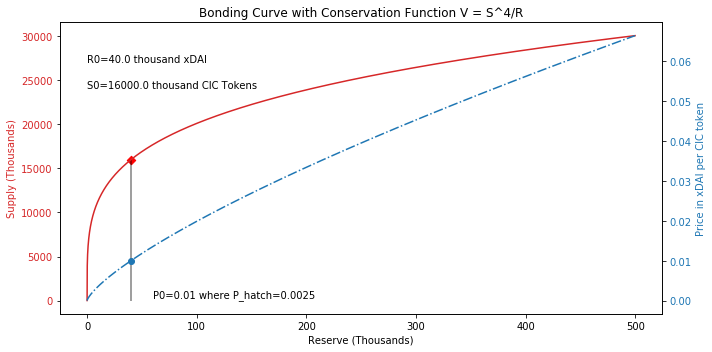

In [3]:
R0 =  40 #thousand xDAI
kappa = 4 #leverage
P0 = 1/100 #initial price
S0 = kappa*R0/P0
p0 = R0/S0
phi = .01

#initial value of conservation function
V0 = invariant(R0,S0,kappa)

reserve = np.arange(0,500,.05)
supp = np.array([supply(r,kappa, V0) for r in reserve])
price = np.array([spot_price(r,kappa, V0) for r in reserve])

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Reserve (Thousands)')
ax1.set_ylabel('Supply (Thousands)', color=color)
ax1.plot(reserve, supp,'-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price in xDAI per CIC token', color=color)  # we already handled the x-label with ax1
ax2.plot(reserve, price,'-.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.vlines(R0,0,S0, alpha=.5)
ax1.scatter(R0,S0, color='red', marker='D')
# ax1.text(R0+.02*reserve[-1], .9*supp[-1], "Initial Value R0="+str(int(100*R0)/100)+" million Reserve Units")
# ax1.text(R0+.02*reserve[-1], .70*supp[-1], "Initial Value S0="+str(S0)+" million Tokens")
ax1.text(-.4, .9*supp[-1], "R0="+str(int(100*R0)/100)+" thousand xDAI")
ax1.text(-.4, .80*supp[-1], "S0="+str(S0)+" thousand CIC Tokens")

#ax1.hlines(S0,0,R0)

# ax2.text(R0+.02*reserve[-1], price[25], "Initial Value P0="+str(spot_price(R0,kappa,V0)))
# ax2.text(R0+.02*reserve[-1], price[25]/10, "where P_hatch="+str(p0))
ax2.text(R0+.04*reserve[-1], price[25], "P0="+str(spot_price(R0,kappa,V0))+" where P_hatch="+str(p0))
ax2.scatter(R0,spot_price(R0,kappa,V0), color=color)

plt.title('Bonding Curve with Conservation Function V = S^'+str(kappa)+'/R')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The figure above represents the base case as determined by the originally suggested values by the stakeholder.

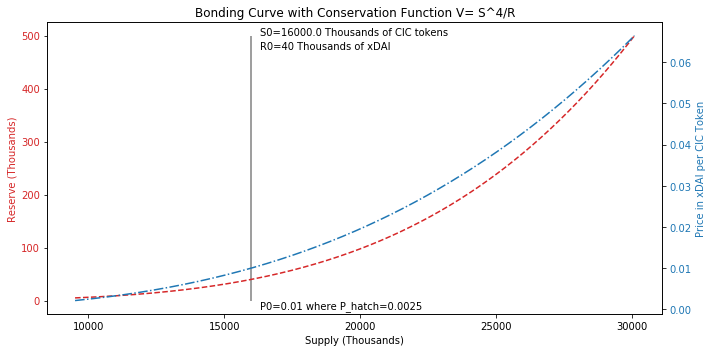

In [4]:
fig, ax1 = plt.subplots(figsize=(10,5))

cp = 100
color = 'tab:red'
ax1.set_xlabel('Supply (Thousands)')
ax1.set_ylabel('Reserve (Thousands)', color=color)
ax1.plot(supp[cp:], reserve[cp:],'--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price in xDAI per CIC Token', color=color)  # we already handled the x-label with ax1
ax2.plot(supp[cp:], price[cp:],'-.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.vlines(S0,0,reserve[-1], alpha=.5)
ax1.text(S0*1.02, reserve[-1], "S0="+str(int(100*S0)/100)+" Thousands of CIC tokens")
ax1.text(S0*1.02, .95*reserve[-1], "R0="+str(R0)+" Thousands of xDAI")
#ax1.hlines(S0,0,R0)

ax2.text(S0*1.02, price[3], "P0="+str(spot_price(R0,kappa,V0))+" where P_hatch="+str(p0))


plt.title('Bonding Curve with Conservation Function V= S^'+str(kappa)+'/R')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [5]:
#given V0 and kappa
#sweep the reserve
reserve = None
reserve = np.arange(.01,100,.01)
price = np.array([spot_price(r,kappa, V0) for r in reserve])

#realized price for withdrawing burning .1% of tokens (without fee)
burn_price=[withdraw(supply(r,kappa,V0)/1000, r,supply(r,kappa,V0), kappa, V0, 0)[1] for r in reserve]

#realized price for depositing .1% more Xdai into the reserve (without fee)
mint_price=[mint(r/1000, r, supply(r,kappa,V0), kappa, V0, 0)[1] for r in reserve]

#realized price for withdrawing .1% of the Xdai from the reserve (without fee)
withdraw_price=[withdrawR(r/1000, r, supply(r,kappa,V0), kappa, V0, 0)[1] for r in reserve]

#realized price for depositing .1% more Xdai into the reserve (with fee)
mint_price_fee=[mint(r/1000, r, supply(r,kappa,V0), kappa, V0, phi)[1] for r in reserve]

#realized price for withdrawing .1% of the Xdai from the reserve (with fee)
withdraw_price_fee=[withdrawR(r/1000, r, supply(r,kappa,V0), kappa, V0, phi)[1] for r in reserve]

In [6]:
#from IPython.display import Image
#Image(filename='slippage.jpeg')

In [7]:
pdf = pd.DataFrame({'reserve':reserve, 'spot_price':price, '.1% mint_price':mint_price,'.1% withdraw_price':withdraw_price,'.1% mint_price w/fee':mint_price_fee,'.1% withdraw_price w/fee':withdraw_price_fee })

In [8]:
pdf.head()

,reserve,spot_price,.1% mint_price,.1% withdraw_price,.1% mint_price w/fee,.1% withdraw_price w/fee
0,0.01,0.000020,0.000020,0.000020,0.000020,0.000020
1,0.02,0.000033,0.000033,0.000033,0.000034,0.000034
2,0.03,0.000045,0.000045,0.000045,0.000046,0.000046
3,0.04,0.000056,0.000056,0.000056,0.000057,0.000057
4,0.05,0.000066,0.000067,0.000066,0.000067,0.000067


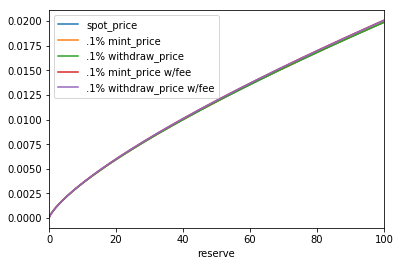

In [9]:
pdf.plot(x='reserve')

In [10]:
pdf['mint_slippage'] = (pdf['.1% mint_price']-pdf['spot_price'])/pdf['spot_price']
pdf['withdraw_slippage'] = (pdf['spot_price']-pdf['.1% withdraw_price'])/pdf['spot_price']
pdf['mint_slippage_fee'] = (pdf['.1% mint_price w/fee']-pdf['spot_price'])/pdf['spot_price']
pdf['withdraw_slippage_fee'] = (pdf['spot_price']-pdf['.1% withdraw_price w/fee'])/pdf['spot_price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c979780>,
      dtype=object)

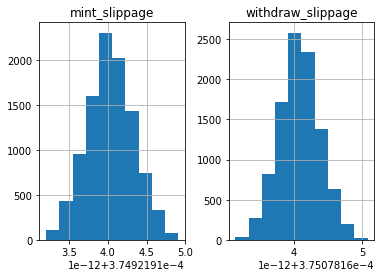

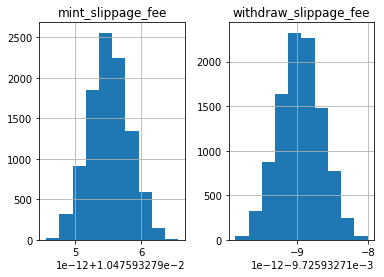

In [11]:
pdf[['mint_slippage', 'withdraw_slippage']].hist()
pdf[['mint_slippage_fee', 'withdraw_slippage_fee']].hist()

In [12]:
#given V0 and kappa
R = 40
S = supply(R,kappa,V0)
p = spot_price(R,kappa,V0)
#sweep the transaction fraction
TXF = np.logspace(-6, 1, num=5000)

#realized price for withdrawing txf of Xdai
withdraw_price2=[withdrawR(R*txf, R,S, kappa, V0, 0)[1] for txf in TXF]
withdraw_price2_fee=[withdrawR(R*txf, R,S, kappa, V0, phi)[1] for txf in TXF]

#realized price for depositing txf more Xdai into the reserve
mint_price2=[mint(R*txf, R,S, kappa, V0,0)[1] for txf in TXF]
mint_price2_fee=[mint(R*txf, R,S, kappa, V0,phi)[1] for txf in TXF]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [13]:
pdf2 = pd.DataFrame({'tx_fraction':TXF, 'spot_price':p*np.ones(len(TXF)), 'mint_price':mint_price2,'withdraw_price':withdraw_price2, 'mint_price_fee':mint_price2_fee,'withdraw_price_fee':withdraw_price2_fee })

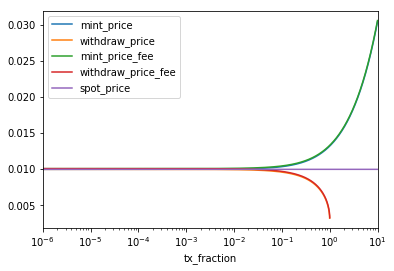

In [14]:
pdf2.plot(x='tx_fraction',y=['mint_price','withdraw_price','mint_price_fee','withdraw_price_fee','spot_price'], logx=True)

In [15]:
pdf2['bond_to_mint_slippage'] = (pdf2['mint_price']-pdf2['spot_price'])/pdf2['spot_price']
pdf2['burn_to_withdraw_slippage'] = (pdf2['spot_price']-pdf2['withdraw_price'])/pdf2['spot_price']

pdf2['bond_to_mint_slippage_fee'] = (pdf2['mint_price_fee']-pdf2['spot_price'])/pdf2['spot_price']
pdf2['burn_to_withdraw_slippage_fee'] = (pdf2['spot_price']-pdf2['withdraw_price_fee'])/pdf2['spot_price']

In [16]:
ticks=[10**k for k in range(-6,1)]
bound = .026 #need to figure out this analytically in terms of kappa and phi

Text(0.5, 0, 'Transaction size as percent of the asset Burned or Bonded\nnormalizd units: bonded/Reserve, burned/Supply')

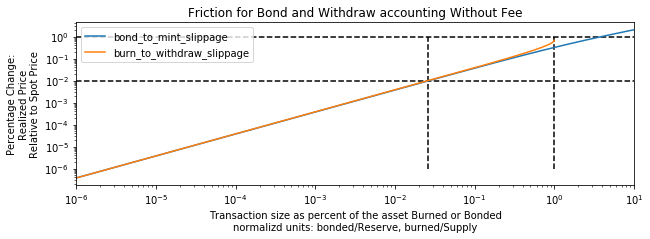

In [17]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hlines(phi, TXF[0],TXF[-1], linestyle='--')
ax.hlines(1, TXF[0],TXF[-1], linestyle='--')
ax.vlines(bound, ticks[0],ticks[-1], linestyle='--')
ax.vlines(1, ticks[0],ticks[-1], linestyle='--')
pdf2.plot(x='tx_fraction', y = ['bond_to_mint_slippage', 'burn_to_withdraw_slippage'], logx=True, logy=True, ax=ax)
plt.title("Friction for Bond and Withdraw accounting Without Fee")
plt.ylabel("""Percentage Change:
Realized Price
Relative to Spot Price""")
plt.yticks([10**k for k in range(-6,1)])
plt.xlabel("""Transaction size as percent of the asset Burned or Bonded
normalizd units: bonded/Reserve, burned/Supply""")

Text(0.5, 0, 'Transaction size as percent of the xDAI Reserve\nnormalizd units: bonded/Reserve, withdraw/Reserve')

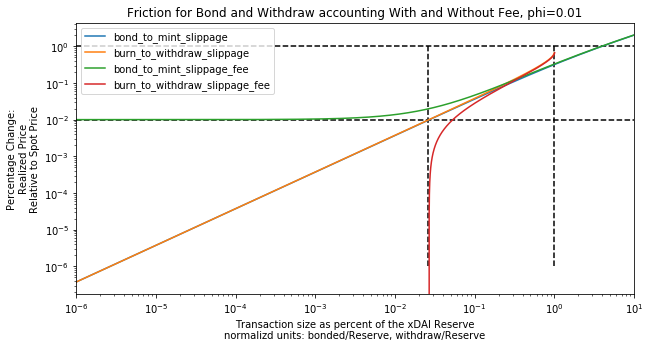

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hlines(phi, TXF[0],TXF[-1], linestyle='--')
ax.hlines(1, TXF[0],TXF[-1], linestyle='--')
ax.vlines(bound, ticks[0],ticks[-1], linestyle='--')
ax.vlines(1, ticks[0],ticks[-1], linestyle='--')
pdf2.plot(x='tx_fraction', y = ['bond_to_mint_slippage', 'burn_to_withdraw_slippage','bond_to_mint_slippage_fee', 'burn_to_withdraw_slippage_fee'], logx=True, logy=True, ax=ax)
plt.title("Friction for Bond and Withdraw accounting With and Without Fee, phi="+str(phi))
plt.ylabel("""Percentage Change:
Realized Price
Relative to Spot Price""")
plt.yticks([10**k for k in range(-6,1)])
plt.xlabel("""Transaction size as percent of the xDAI Reserve
normalizd units: bonded/Reserve, withdraw/Reserve""")

[(0.01, 4.475613870122653), (0.02509430066318874, 10.0)]

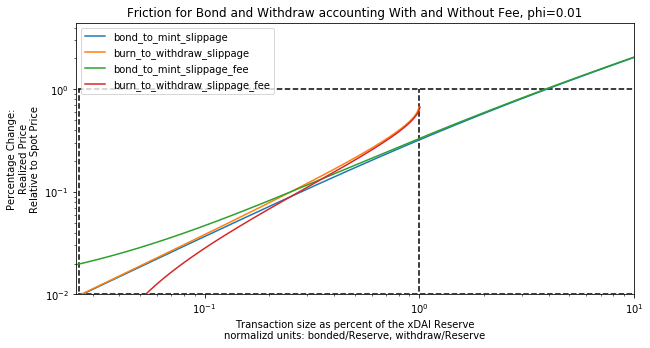

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hlines(phi, TXF[0],TXF[-1], linestyle='--')
ax.hlines(1, TXF[0],TXF[-1], linestyle='--')
ax.vlines(bound, ticks[0],ticks[-1], linestyle='--')
ax.vlines(1, ticks[0],ticks[-1], linestyle='--')
#ax.plot([ticks[0],ticks[-1]],[ticks[0]*phi,ticks[-1]*phi], 'k--')
pdf2.plot(x='tx_fraction', y = ['bond_to_mint_slippage', 'burn_to_withdraw_slippage','bond_to_mint_slippage_fee', 'burn_to_withdraw_slippage_fee'], logx=True, logy=True, ax=ax)
plt.title("Friction for Bond and Withdraw accounting With and Without Fee, phi="+str(phi))
plt.ylabel("""Percentage Change:
Realized Price
Relative to Spot Price""")
plt.yticks(ticks)
plt.xlabel("""Transaction size as percent of the xDAI Reserve
normalizd units: bonded/Reserve, withdraw/Reserve""")
axis = ax.axis()
ax.set(xlim=((1.0-(1.0-phi)**(1.0/kappa))*10, axis[1]), ylim=(phi, axis[3]))

Text(0.5, 0, 'Transaction size as percent of the xDAI Reserve\nnormalizd units: bonded/Reserve, withdraw/Reserve')

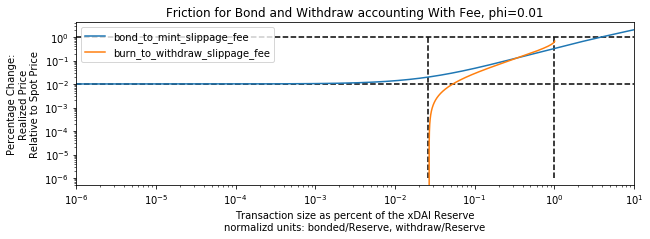

In [20]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hlines(phi, TXF[0],TXF[-1], linestyle='--')
ax.hlines(1, TXF[0],TXF[-1], linestyle='--')
ax.vlines(bound, ticks[0],ticks[-1], linestyle='--')
ax.vlines(1, ticks[0],ticks[-1], linestyle='--')
pdf2.plot(x='tx_fraction', y = ['bond_to_mint_slippage_fee', 'burn_to_withdraw_slippage_fee'], logx=True, logy=True, ax=ax)
plt.title("Friction for Bond and Withdraw accounting With Fee, phi="+str(phi))
plt.ylabel("""Percentage Change:
Realized Price
Relative to Spot Price""")
plt.yticks(ticks)
plt.xlabel("""Transaction size as percent of the xDAI Reserve
normalizd units: bonded/Reserve, withdraw/Reserve""")

#axis = ax.axis()
#ax.set(xlim=(bound*.99, axis[1]), ylim=(phi, axis[3]))

[(0.01, 4.2613703055703915), (0.02574, 10.0)]

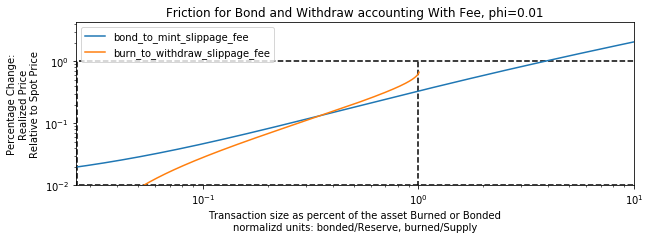

In [21]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hlines(phi, TXF[0],TXF[-1], linestyle='--')
ax.hlines(1, TXF[0],TXF[-1], linestyle='--')
ax.vlines(bound, ticks[0],ticks[-1], linestyle='--')
ax.vlines(1, ticks[0],ticks[-1], linestyle='--')
pdf2.plot(x='tx_fraction', y = ['bond_to_mint_slippage_fee', 'burn_to_withdraw_slippage_fee'], logx=True, logy=True, ax=ax)
plt.title("Friction for Bond and Withdraw accounting With Fee, phi="+str(phi))
plt.ylabel("""Percentage Change:
Realized Price
Relative to Spot Price""")
plt.yticks(ticks)
plt.xlabel("""Transaction size as percent of the asset Burned or Bonded
normalizd units: bonded/Reserve, burned/Supply""")

axis = ax.axis()
ax.set(xlim=(bound*.99, axis[1]), ylim=(phi, axis[3]))

Curvature $\kappa=4$ was proposed by Grassroots Economics. This analysis sought to demonstrate this choice and review for any potential red flags. Seems reasonable under the assumptions provided but further analysis is merited to provide context. Such analysis is possible using the cadCAD models also available in this repo.

Fees $\phi$ if desired are suggested at $0.001%$ which is $0.1%$ or $10$ basis points. Largely subjective but exist to manage the following considerations: fees should not impose undue strain on users of the system but some fees help reduce spam or noise the system. Fees do not need to be large because the system already has baked in slippage in its invariant preserving logic. If the smart contract is restricted to a whitelist of only institutional actors with additional vetting, fees are not necessary at all. Given the goals and status of the CIC project, no fees are recommended initially, but an extremely narrow whitelist should be used. Access to CICs is provided through community development programs rather than through direct use of the bonding curve smart contracts.